Simulation of Multivariate Normal Distribution

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

In [7]:
mean1 = torch.tensor([-0.5, -0.5])
cov1 = torch.tensor([[1, 0.25], [0.25, 1]])

mean2 = torch.tensor([0.5, 0.5])
cov2 = torch.tensor([[1, 0.25], [0.25, 1]])

In [8]:
m = 1000 

In [9]:
dist1 = torch.distributions.MultivariateNormal(mean1, cov1)
X1 = dist1.sample((m,))

dist2 = torch.distributions.MultivariateNormal(mean2, cov2)
X2 = dist2.sample((m,))

In [10]:
X = torch.vstack((X1, X2))

In [11]:
X

tensor([[-1.1645, -0.4198],
        [-0.8463, -1.5483],
        [-0.1296, -0.2377],
        ...,
        [-0.2908, -0.6224],
        [-0.0367,  0.7770],
        [-0.0861,  0.9229]])

In [12]:
meanX = torch.mean(X, dim=0)
covX = torch.cov(X.T) 

print('meanX: ', meanX)
print('covX: ', covX)

meanX:  tensor([-0.0097,  0.0081])
covX:  tensor([[1.2314, 0.5112],
        [0.5112, 1.2585]])


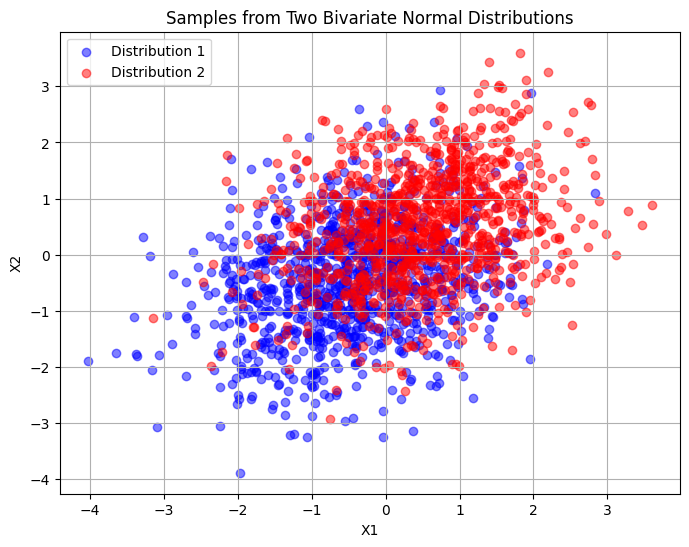

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(X1[:, 0].numpy(), X1[:, 1].numpy(), color='blue', alpha=0.5, label='Distribution 1')
plt.scatter(X2[:, 0].numpy(), X2[:, 1].numpy(), color='red', alpha=0.5, label='Distribution 2')
plt.title("Samples from Two Bivariate Normal Distributions")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.grid(True)
plt.show()

In [15]:
print("Mean of the combined tensor X:")
print(meanX)

print("\nCovariance matrix of the combined tensor X:")
print(covX)

Mean of the combined tensor X:
tensor([-0.0097,  0.0081])

Covariance matrix of the combined tensor X:
tensor([[1.2314, 0.5112],
        [0.5112, 1.2585]])


K-Means Clustering

In [17]:
# Scale the X
X_min, X_max = 1, 10

# Find the minimum and maximum values of the original data
X_min_original = torch.min(X, dim=0).values
X_max_original = torch.max(X, dim=0).values

# Apply min-max scaling to each feature in X 
X_scaled = X_min + (X - X_min_original) / (X_max_original - X_min_original) * (X_max - X_min)


In [20]:
X_scaled # X is between 1 & 10

tensor([[4.3805, 5.1664],
        [4.7560, 3.8086],
        [5.6015, 5.3855],
        ...,
        [5.4114, 4.9227],
        [5.7111, 6.6064],
        [5.6529, 6.7820]])

In [21]:
# Function to initialize k random centroids (centers)
def initialize_centroids(X, k):
    indices = torch.randperm(X.shape[0])[:k]
    return X[indices]

In [22]:
# Distance between points ans centroids
def compute_distances(X, centroids):
    return torch.cdist(X, centroids)

In [23]:
# To assign clusters
def assign_clusters(X, centroids):
    distances = compute_distances(X, centroids)
    return torch.argmin(distances, dim=1)

In [24]:
# To update centroids
def update_centroids(X, cluster_assignments, k):
    new_centroids = []
    for i in range(k):
        cluster_points = X[cluster_assignments == i]
        new_centroids.append(cluster_points.mean(dim=0))
    return torch.stack(new_centroids)

In [25]:
# K-means algorithm 
def kmeans(X, k, num_iters=100):
    # Initialize centroids
    centroids = initialize_centroids(X, k)
    
    for i in range(num_iters):
        # Assign points to the nearest centroid
        cluster_assignments = assign_clusters(X, centroids)
        
        # Update centroids based on the mean of assigned points
        new_centroids = update_centroids(X, cluster_assignments, k)
        
        # Check for convergence (if centroids do not change)
        if torch.allclose(centroids, new_centroids):
            break
        
        centroids = new_centroids
    
    return centroids, cluster_assignments

In [26]:
centers, clusters = kmeans(X, 4)
print(f"Centroids", centers)
print(f"Clusters", clusters)

Centroids tensor([[ 0.6825, -0.4406],
        [-1.1624, -1.2225],
        [-0.5581,  0.4910],
        [ 1.1474,  1.3544]])
Clusters tensor([1, 1, 0,  ..., 0, 2, 2])


Projection with Principal Component Analysis

In [27]:
from sklearn.decomposition import PCA

In [28]:
# Generate data
x = np.random.normal(0,1,(100, 4))
x[:, 2] = 3*x[:, 0] - 2*x[:, 1] + np.random.normal(0, 0.1, 100)
x[:, 3] = 1.5*x[:, 0] - 0.5*x[:, 1] + np.random.normal(0, 0.1, 100)

In [30]:
# Each feature will have xero mean
x = x - np.mean(x, axis=0)
x


array([[-6.48622278e-01,  2.22712612e-01, -2.49175231e+00,
        -1.10194004e+00],
       [ 2.79762078e-01, -2.70625858e-01,  1.40112508e+00,
         4.05847536e-01],
       [ 1.52935102e+00,  9.54567618e-01,  2.61759062e+00,
         1.75383011e+00],
       [-7.63075411e-01,  4.32244587e-01, -3.26316653e+00,
        -1.45823194e+00],
       [-1.01145772e+00, -1.52453525e+00,  1.20214278e-01,
        -8.40597003e-01],
       [ 1.18481784e+00, -9.79245552e-01,  5.58136164e+00,
         2.33450029e+00],
       [ 4.25577411e-02,  1.65444914e-01, -2.40398512e-01,
        -2.29788472e-01],
       [ 6.91785934e-01, -9.45123930e-02,  2.18138941e+00,
         1.03659789e+00],
       [ 1.94621967e+00,  9.74148219e-01,  3.82583185e+00,
         2.41694913e+00],
       [ 3.43717999e-02, -9.86390153e-01,  1.98179531e+00,
         5.10485244e-01],
       [ 1.03034961e+00,  5.02338329e-02,  3.04624557e+00,
         1.64218871e+00],
       [-3.94379372e-02, -1.67088935e+00,  3.26891666e+00,
      

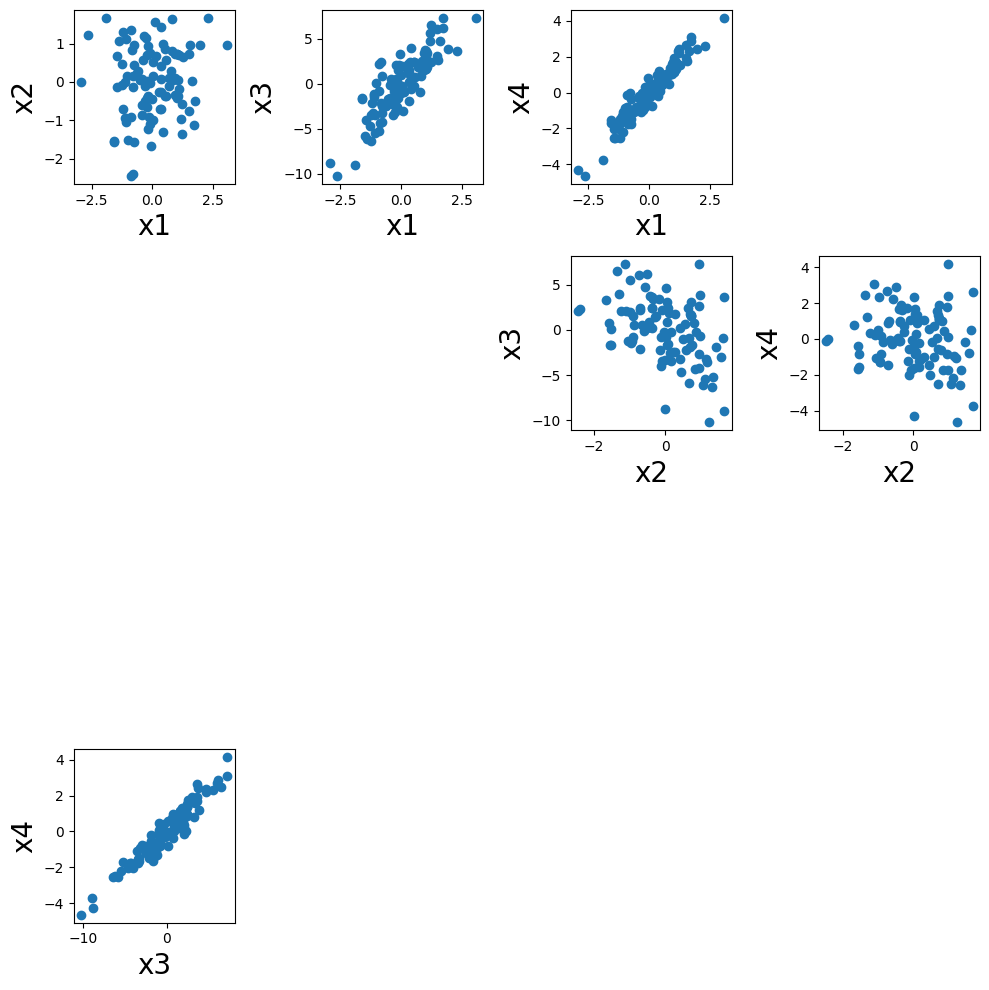

In [31]:
plt.figure(figsize=(10, 10))

for i in range(4):
    for j in range(4):
        if j>i:
            plt.subplot(4,4,i*4+j+i)
            plt.scatter(x[:,i], x[:,j])
            plt.xlabel(f'x{i+1}', fontsize=20)
            plt.ylabel(f'x{j+1}', fontsize=20)
            
plt.tight_layout()

In [32]:
# initialize
pca = PCA(n_components=4)

# fit
pca.fit(x)

PCA(n_components=4)

In [33]:
# get principal components
principal_comps_builtin = pca.components_.T


In [34]:
# print each principal component
for i, component in enumerate(pca.components_):
    print(f'principal_component {i}')
    print(component)
    print()

principal_component 0
[-0.23720948  0.08623103 -0.88127318 -0.39956658]

principal_component 1
[-0.47164448 -0.79717669  0.1951491  -0.32245563]

principal_component 2
[ 0.20859191  0.31053503  0.36146308 -0.85405026]

principal_component 3
[ 0.82326943 -0.51053063 -0.23370676 -0.08346894]



In [38]:
# to do it by hand

# compute covariance matrix

cov_matrix = sum([x[i].reshape(-1, 1) @ x[i].reshape(1, -1) for i in range(100)])/100
cov_matrix

array([[ 1.09709391,  0.10624437,  3.05931875,  1.59967004],
       [ 0.10624437,  0.81514698, -1.31990186, -0.23885047],
       [ 3.05931875, -1.31990186, 11.7850041 ,  5.25211537],
       [ 1.59967004, -0.23885047,  5.25211537,  2.53377348]])

In [39]:
# eigenvectors and eigenvalues of covariance matrix
eigvecs = np.linalg.eig(cov_matrix)
eigvecs

EigResult(eigenvalues=array([1.51189143e+01, 1.10450384e+00, 5.54691029e-04, 7.04563468e-03]), eigenvectors=array([[ 0.23720948,  0.47164448,  0.82326943, -0.20859191],
       [-0.08623103,  0.79717669, -0.51053063, -0.31053503],
       [ 0.88127318, -0.1951491 , -0.23370676, -0.36146308],
       [ 0.39956658,  0.32245563, -0.08346894,  0.85405026]]))

In [40]:
# sort order by magnitude of eigenvalue
ordering = np.argsort(eigvecs[0])[::-1]
ordering

array([0, 1, 3, 2], dtype=int64)

In [41]:
# get eigenvectors
principal_comps_byhand = eigvecs[1][:,ordering]

In [42]:
# byhand
principal_comps_byhand

array([[ 0.23720948,  0.47164448, -0.20859191,  0.82326943],
       [-0.08623103,  0.79717669, -0.31053503, -0.51053063],
       [ 0.88127318, -0.1951491 , -0.36146308, -0.23370676],
       [ 0.39956658,  0.32245563,  0.85405026, -0.08346894]])

In [43]:
# builtin
principal_comps_builtin

array([[-0.23720948, -0.47164448,  0.20859191,  0.82326943],
       [ 0.08623103, -0.79717669,  0.31053503, -0.51053063],
       [-0.88127318,  0.1951491 ,  0.36146308, -0.23370676],
       [-0.39956658, -0.32245563, -0.85405026, -0.08346894]])